In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns # визуализация данных
import numpy as np
%matplotlib inline

In [30]:
import os
lst = os.listdir('./extracted_data')

lst_data = []
for file in lst:
    lst_data.append(pd.read_csv('./extracted_data/' + file))

In [31]:
all_data = pd.concat(lst_data, ignore_index=True)
all_data

,section_count,max_angle,max_section,average_section,square,time,condition
0,5,90.000000,208.312266,53.679261,13.604793,521.6828,0
1,8,30.566270,733.368257,104.492941,2.749759,1234.1248,0
2,14,67.432991,83.384651,19.959699,56.799247,1422.1607,0
3,1,0.000000,54.083269,54.083269,0.554700,310.1112,0
4,8,323.539717,267.529438,82.138918,127.973177,1554.4516,0
...,...,...,...,...,...,...,...
3171,4,15.531183,424.603344,159.557616,32.358965,360.9790,0
3172,4,281.309932,143.610585,47.188224,15.561553,589.5745,0
3173,2,39.815236,126.063476,69.052535,4.974326,679.1769,0
3174,9,206.980231,343.908418,87.261933,157.301882,645.8964,0


In [32]:
tired_state = len(all_data[all_data.condition == 0]) 
awake_state = len(all_data[all_data.condition == 1]) 
n_samples = tired_state if tired_state < awake_state else awake_state
n_samples

1249

In [33]:
from sklearn.utils import resample
sampled_0 = resample(all_data[all_data.iloc[:, -1] == 0], replace = False, n_samples = n_samples, random_state=39)
sampled_1 = resample(all_data[all_data.iloc[:, -1] == 1], replace = False, n_samples = n_samples, random_state=39)

all_data = pd.concat([sampled_0, sampled_1])

In [34]:
# all_data = all_data.drop("time", axis=1)

In [35]:
len(all_data[all_data.condition == 0])

1249

In [36]:
len(all_data[all_data.condition == 1])

1249

<Axes: >

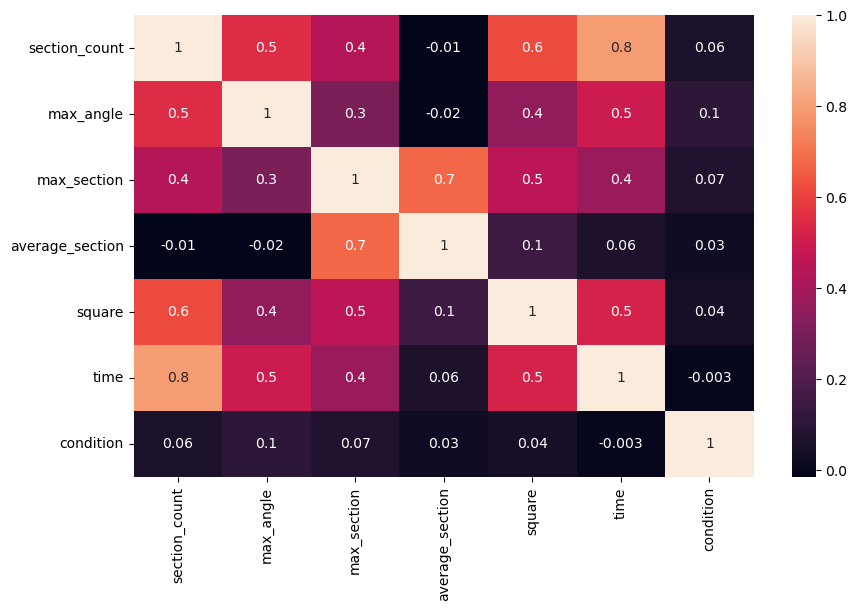

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

In [38]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 2830 to 745
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   section_count    2498 non-null   int64  
 1   max_angle        2498 non-null   float64
 2   max_section      2498 non-null   float64
 3   average_section  2498 non-null   float64
 4   square           2498 non-null   float64
 5   time             2498 non-null   float64
 6   condition        2498 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 156.1 KB


In [39]:
Dup_Rows = all_data[all_data.duplicated()]
Dup_Rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   section_count    0 non-null      int64  
 1   max_angle        0 non-null      float64
 2   max_section      0 non-null      float64
 3   average_section  0 non-null      float64
 4   square           0 non-null      float64
 5   time             0 non-null      float64
 6   condition        0 non-null      int64  
dtypes: float64(5), int64(2)
memory usage: 0.0 bytes


In [40]:
all_data.drop_duplicates(keep='first', inplace = True)

array([[<Axes: title={'center': 'section_count'}>,
        <Axes: title={'center': 'max_angle'}>,
        <Axes: title={'center': 'max_section'}>],
       [<Axes: title={'center': 'average_section'}>,
        <Axes: title={'center': 'square'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'condition'}>, <Axes: >, <Axes: >]],
      dtype=object)

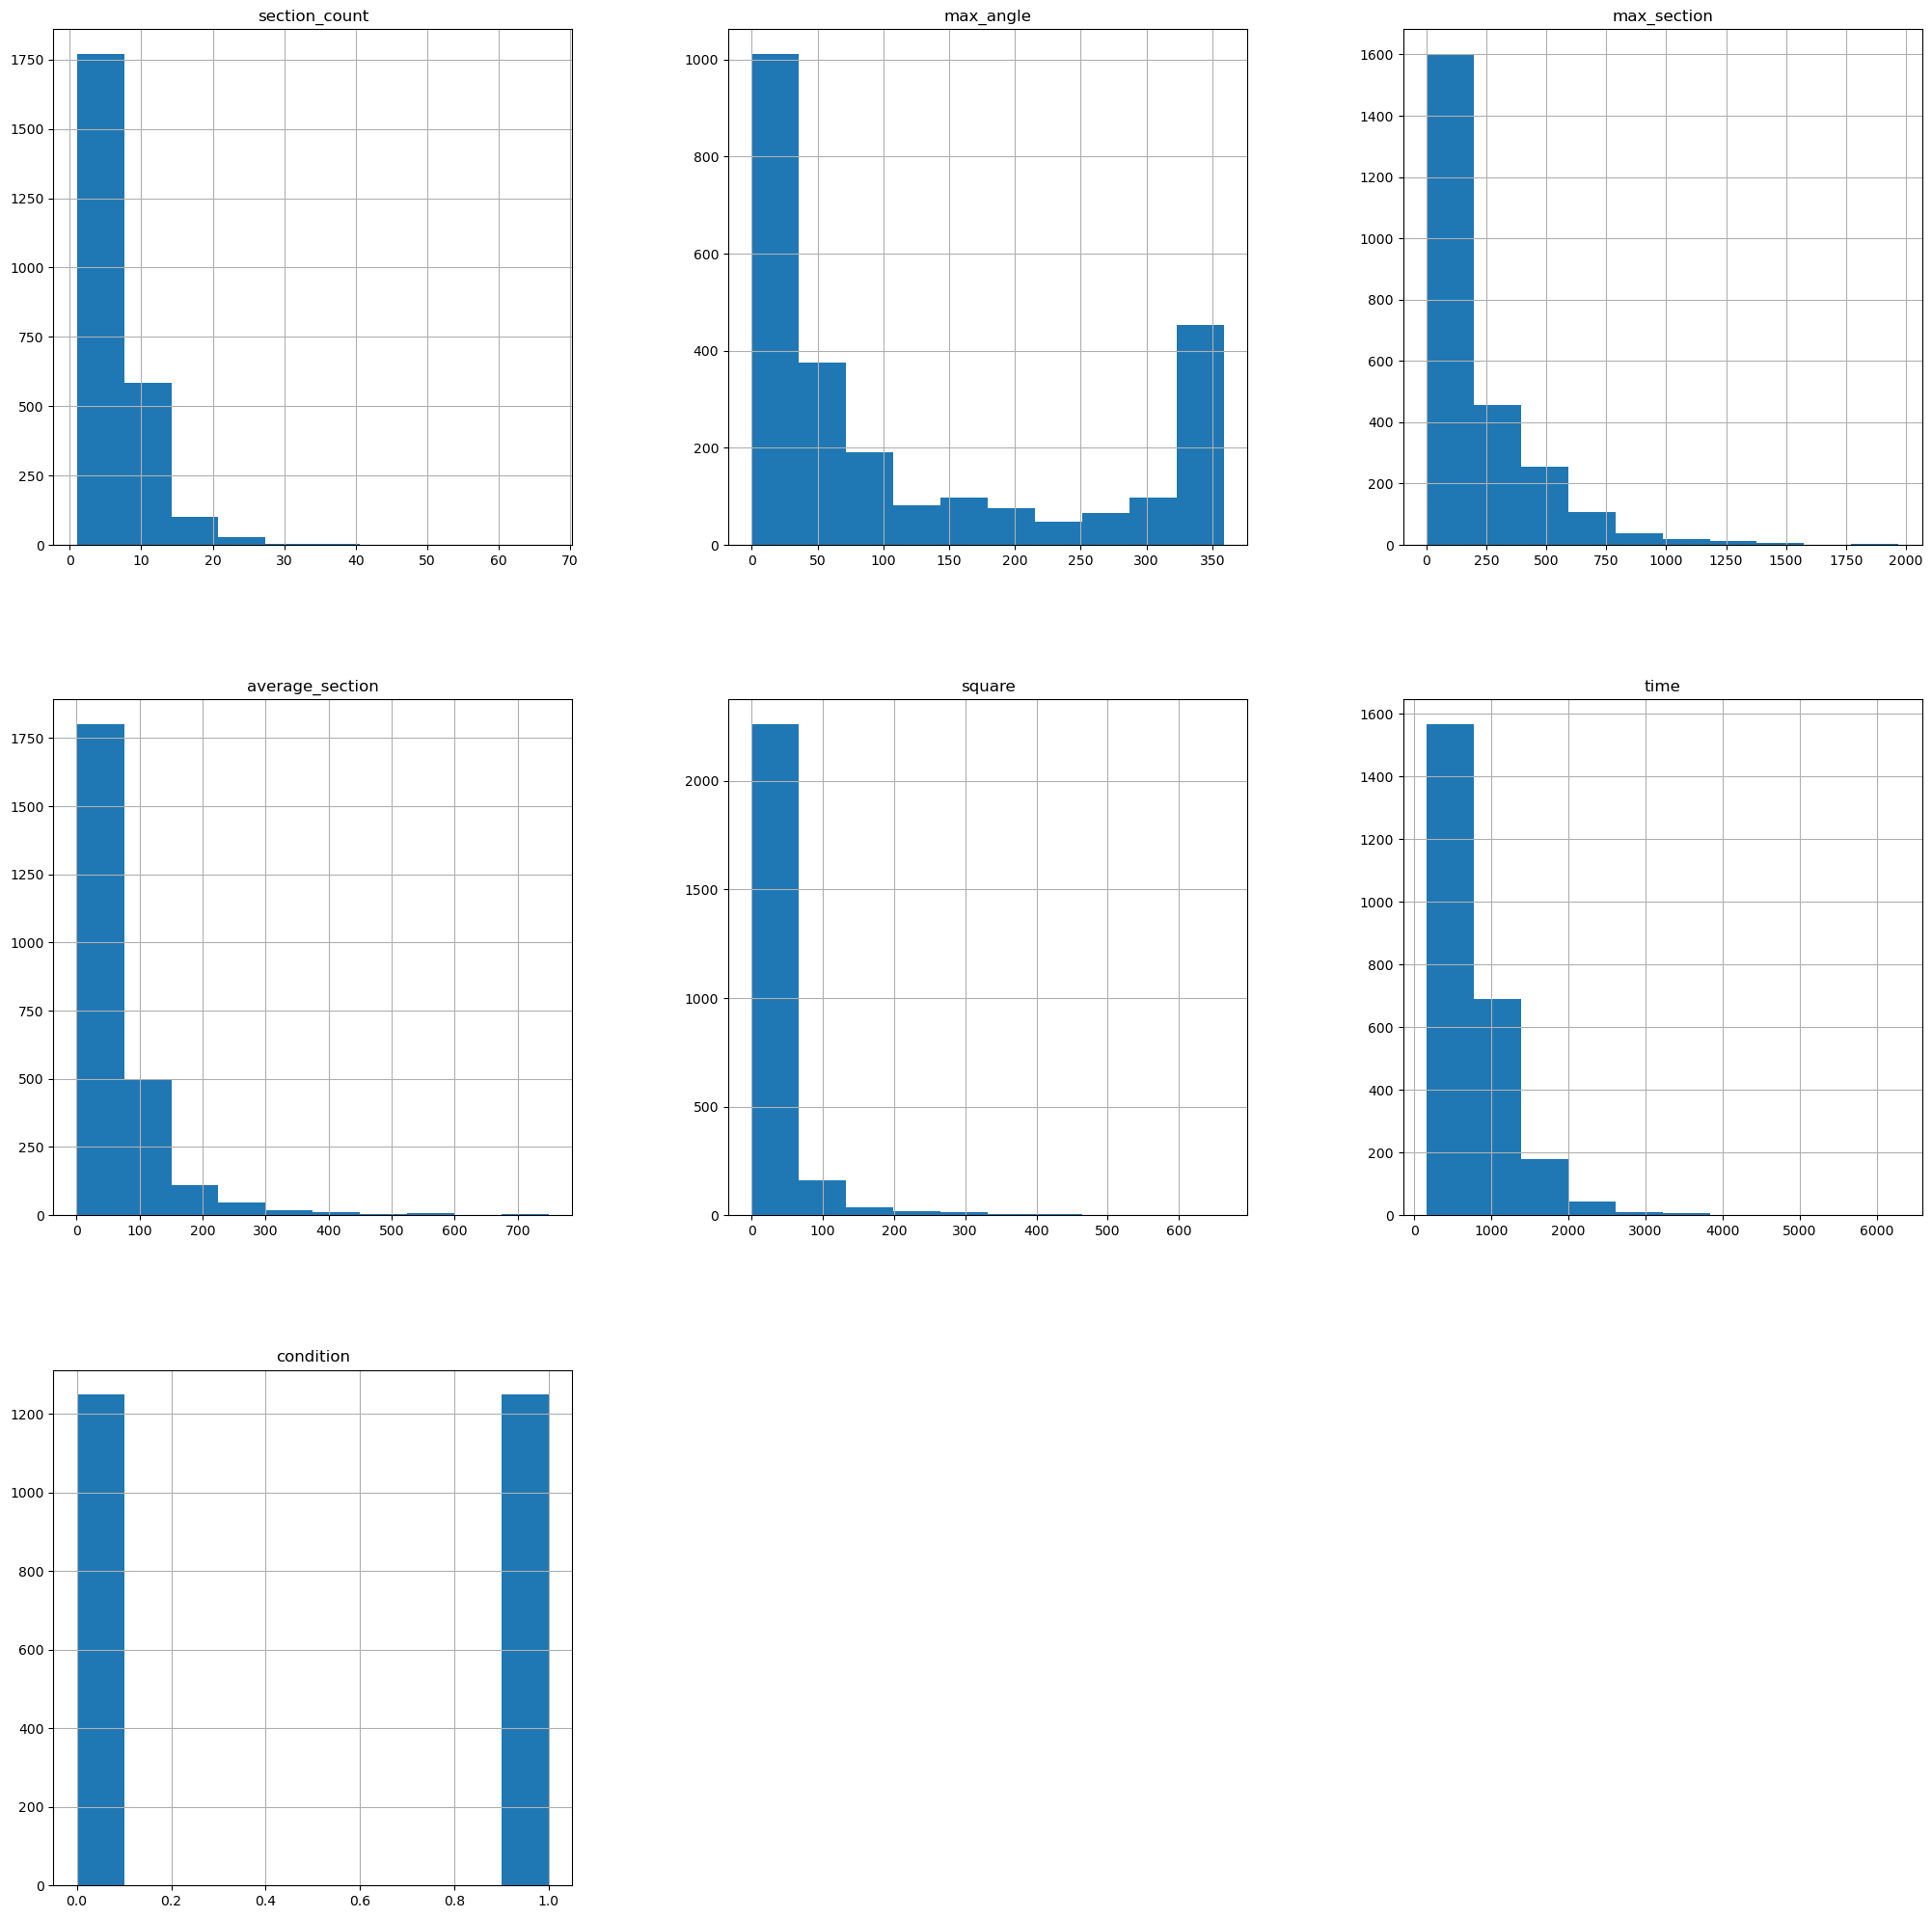

In [41]:
all_data.hist(figsize = (25, 25), grid = True)

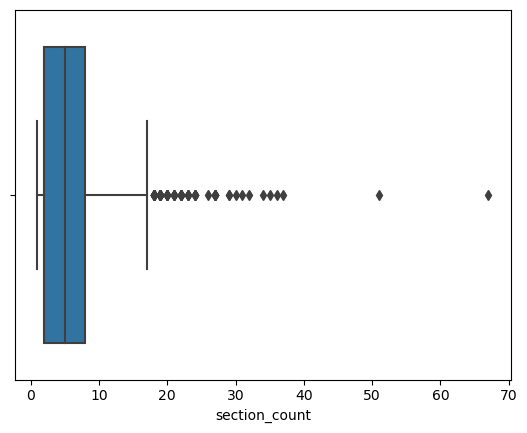

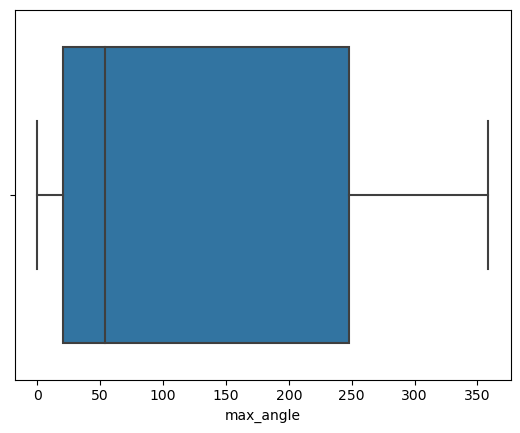

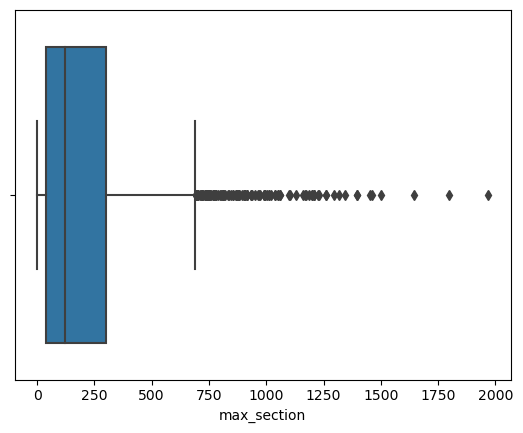

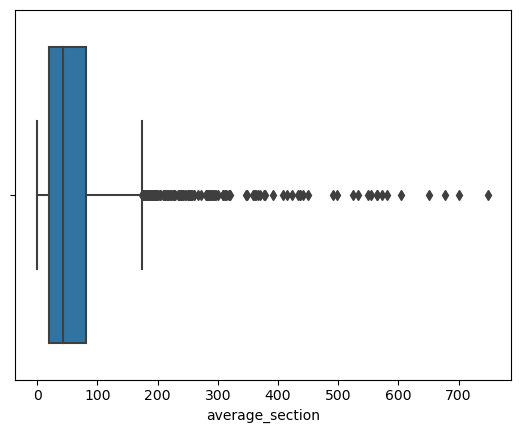

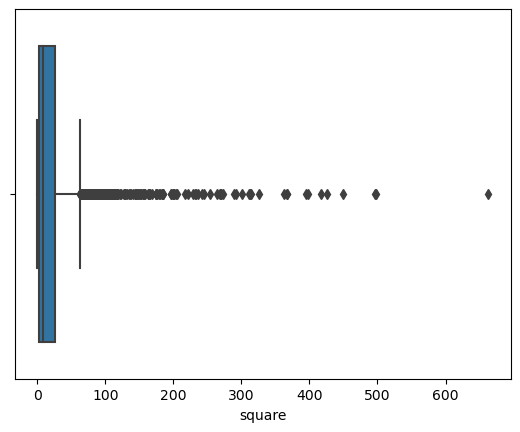

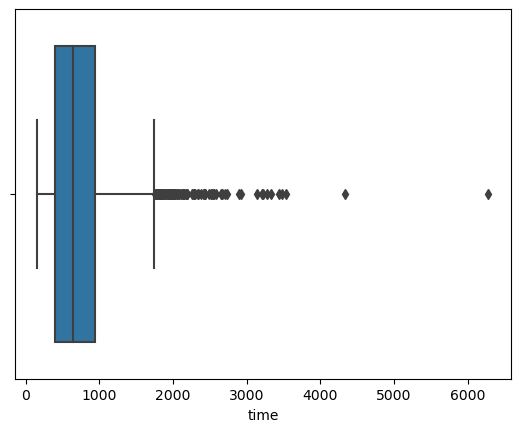

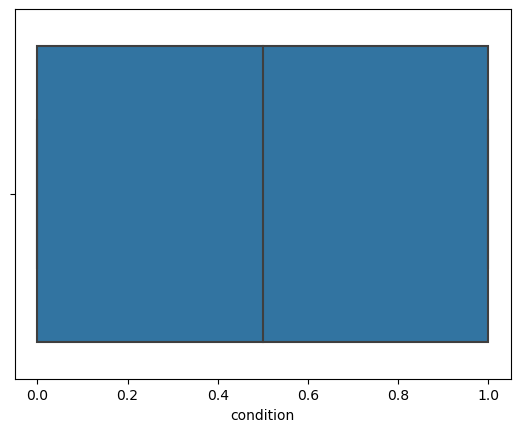

In [42]:
for el in all_data:
    sns.boxplot(x=all_data[el])
    plt.show()

In [43]:
Q1 = all_data.quantile(0.25)
Q3 = all_data.quantile(0.75)
IQR = Q3 - Q1
all_data = all_data[~((all_data < (Q1 - 1.5 * IQR)) |(all_data > (Q3 + 1.5 * IQR))).any(axis=1)]
all_data.shape

(2005, 7)

In [44]:
# all_data.hist(figsize = (25, 25), grid = True)

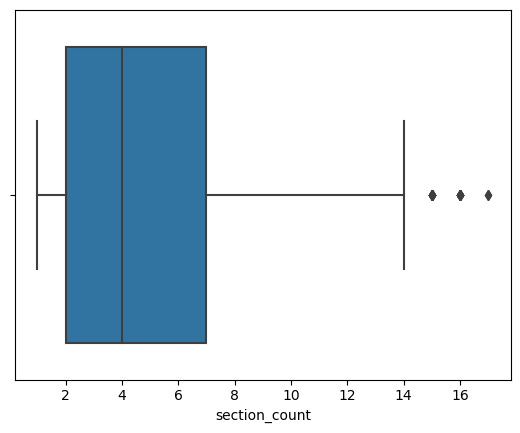

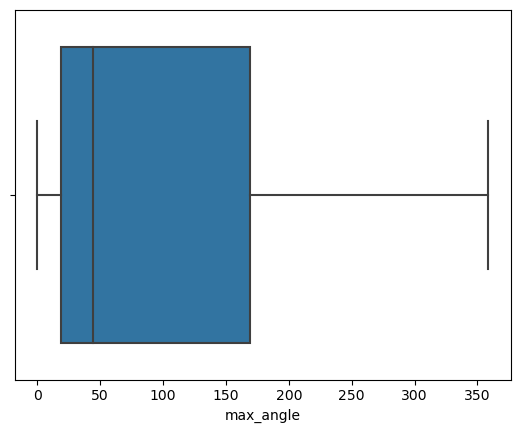

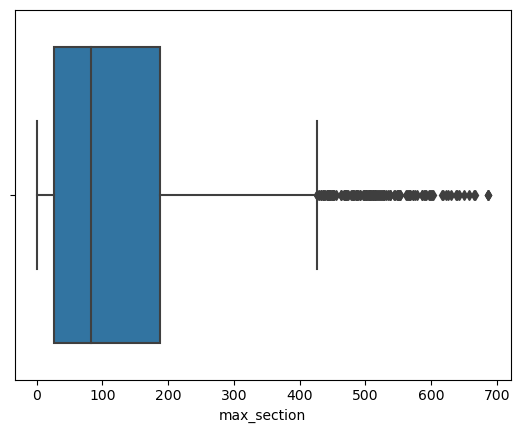

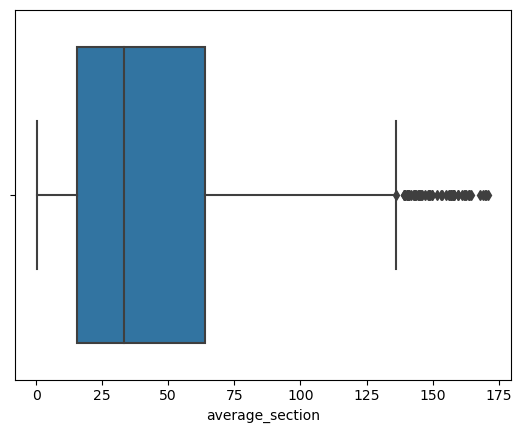

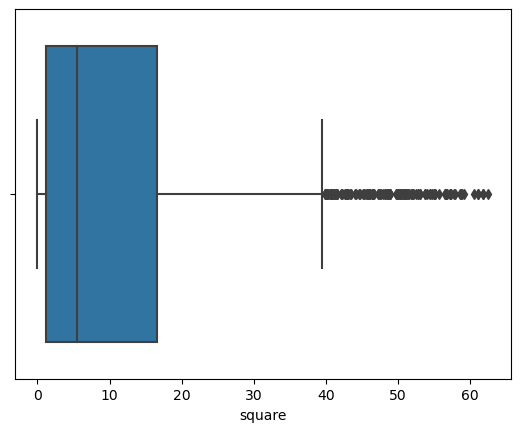

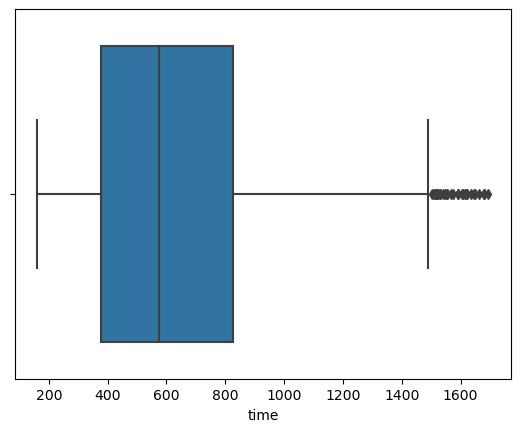

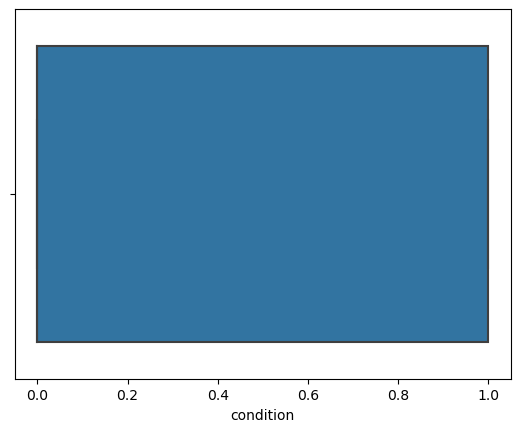

In [45]:
for el in all_data:
    sns.boxplot(x=all_data[el])
    plt.show()

<Axes: >

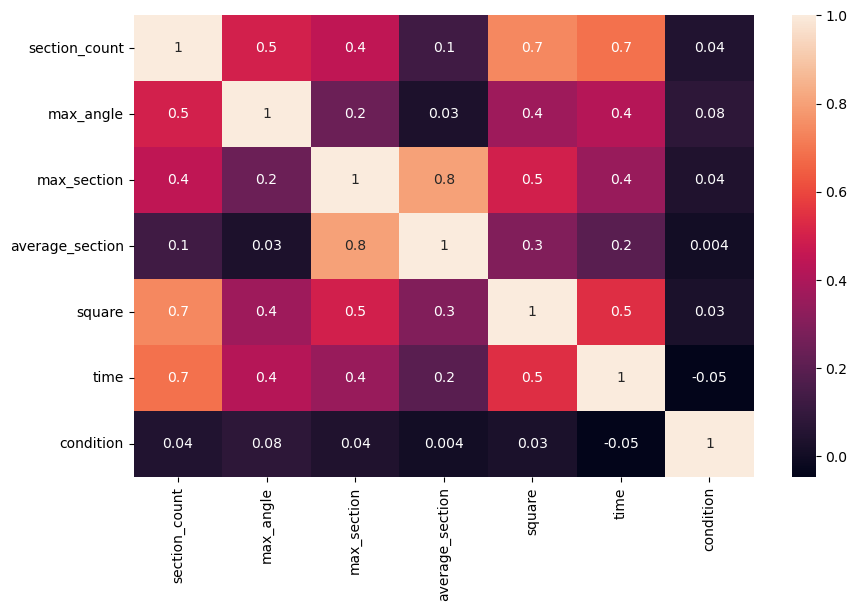

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(all_data.corr(), annot = True, fmt = '.1g')

array([[<Axes: title={'center': 'section_count'}>,
        <Axes: title={'center': 'max_angle'}>,
        <Axes: title={'center': 'max_section'}>],
       [<Axes: title={'center': 'average_section'}>,
        <Axes: title={'center': 'square'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'condition'}>, <Axes: >, <Axes: >]],
      dtype=object)

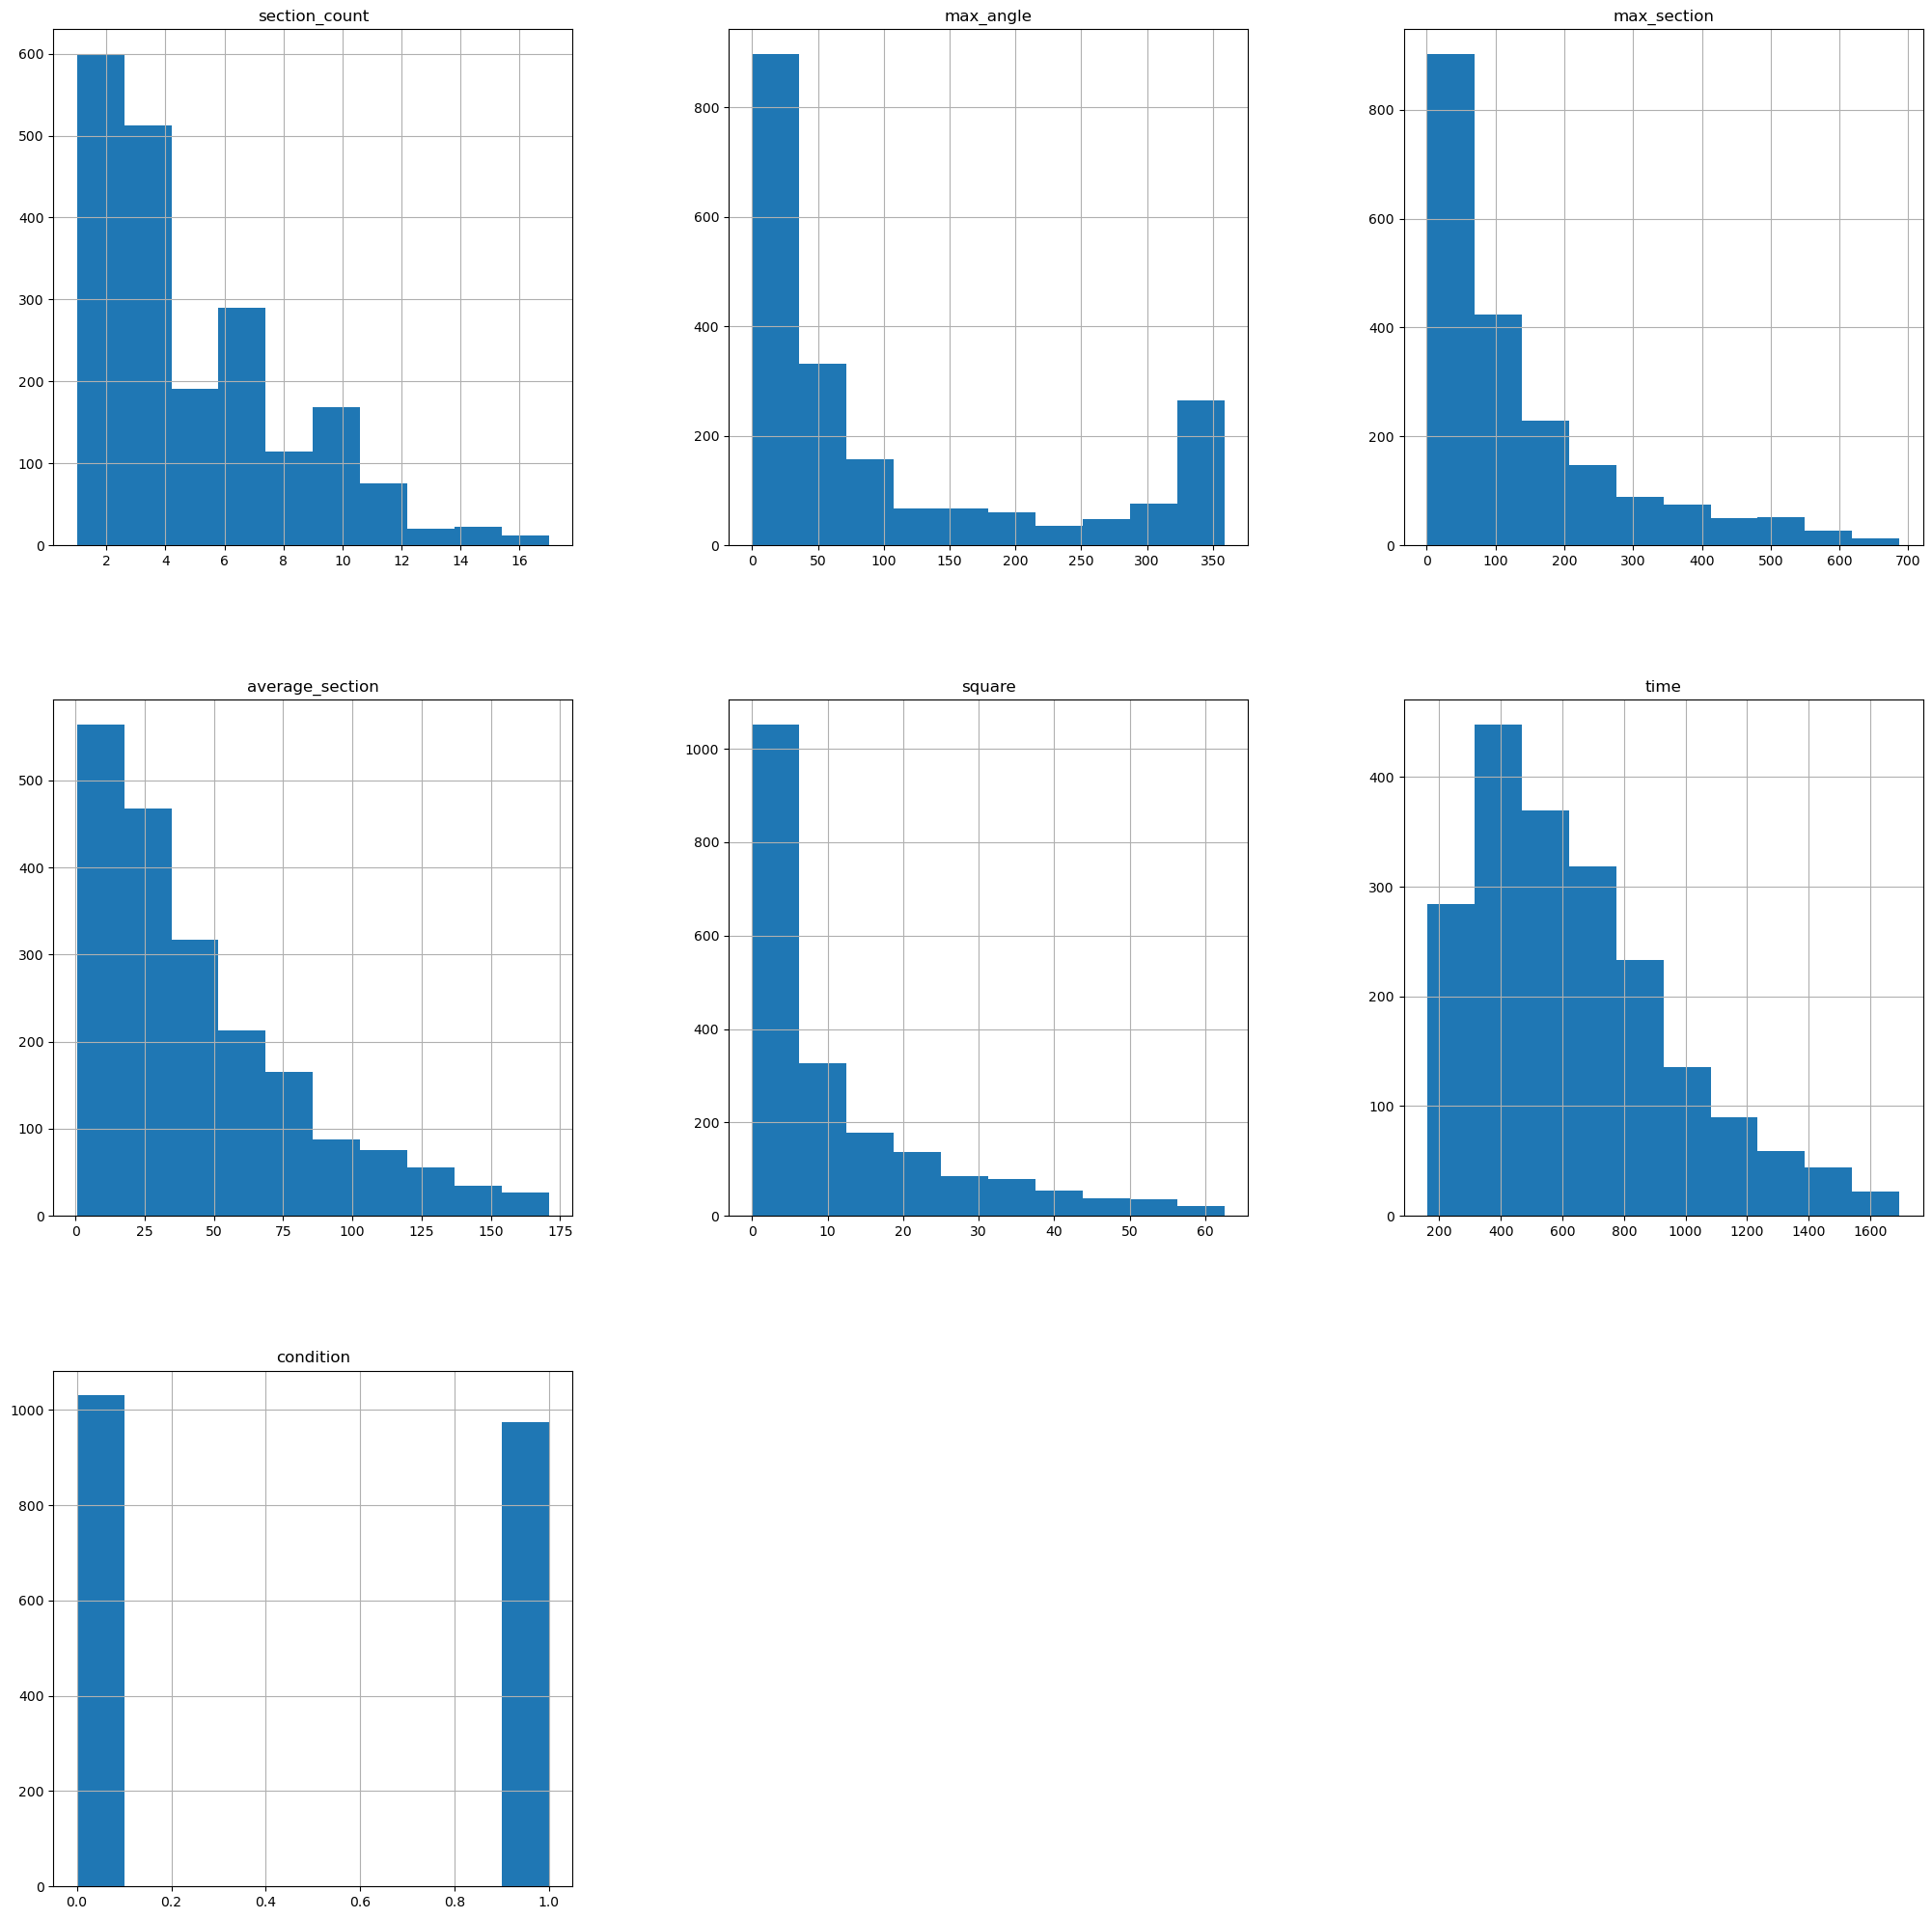

In [47]:
all_data.hist(figsize = (25, 25), grid = True)

In [48]:
import plotly.express as px
from sklearn.decomposition import PCA

X = all_data.drop(["condition", "max_angle"], axis = 1)

pca = PCA(n_components=2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

fig = px.scatter(components, x=0, y=1, color=all_data['condition'])
fig.show()

[0.84897511 0.14632164]


Обучение

In [183]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

In [52]:
isinstance(type, object)

True

In [54]:
issubclass(object, type)

False

In [184]:
X = all_data.drop(['condition'], axis = 1)
y = all_data.condition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [185]:
X_train

,section_count,max_angle,max_section,average_section,square,time
2038,0.000000,0.000000,0.018727,0.049888,0.000970,0.024447
2396,0.075758,0.076004,0.046598,0.033803,0.023194,0.072707
2394,0.060606,0.053853,0.099097,0.084502,0.003330,0.122003
2987,0.075758,0.072770,0.115855,0.112412,0.020629,0.116596
594,0.045455,0.067183,0.017471,0.030928,0.012445,0.045301
...,...,...,...,...,...,...
1781,0.106061,0.193809,0.078881,0.064661,0.037630,0.088473
1023,0.030303,0.098702,0.021687,0.039012,0.007588,0.049380
2104,0.015152,0.981225,0.003085,0.004722,0.000187,0.033889
1969,0.030303,0.139972,0.016768,0.023523,0.009051,0.087423


In [186]:
y_train

2038    0
2396    0
2394    0
2987    0
594     1
       ..
1781    1
1023    1
2104    0
1969    1
1067    1
Name: condition, Length: 1604, dtype: int64

Градиентый бустинг

In [187]:
from xgboost import XGBClassifier

In [188]:
grid_param = {'learning_rate': [0.02], 
        'min_child_weight': [1, 5],
        'max_depth': [2, 5, 10, 50],
        'n_estimators': [50, 100, 500]
        }

In [189]:
xgb = XGBClassifier()
grid_xgb = GridSearchCV(xgb, grid_param, cv = 5)

grid_xgb.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_clf = grid_xgb.best_estimator_
best_clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.02,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': 5,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 500,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
y_pred = best_clf.predict(X_test)

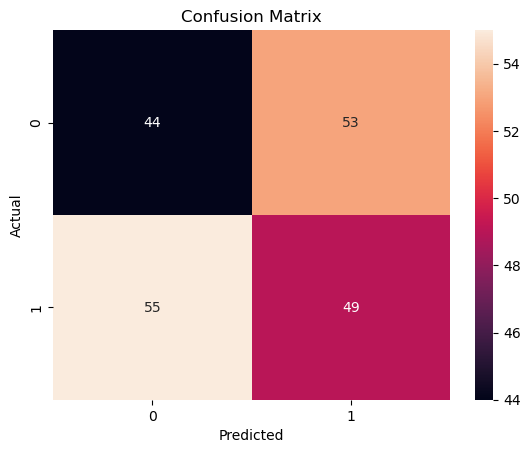

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.44      0.45      0.45        97
     class 1       0.48      0.47      0.48       104

    accuracy                           0.46       201
   macro avg       0.46      0.46      0.46       201
weighted avg       0.46      0.46      0.46       201



Случайный лес

In [ ]:
grid_param = {
    'n_estimators': [50, 100, 200, 400],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 16, 4)
}

In [ ]:
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, grid_param, cv = 5, n_jobs=-1)

grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 16, 4),
                         'n_estimators': [50, 100, 200, 400]})

In [ ]:
best_clf = grid_rfc.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred = best_clf.predict(X_test)

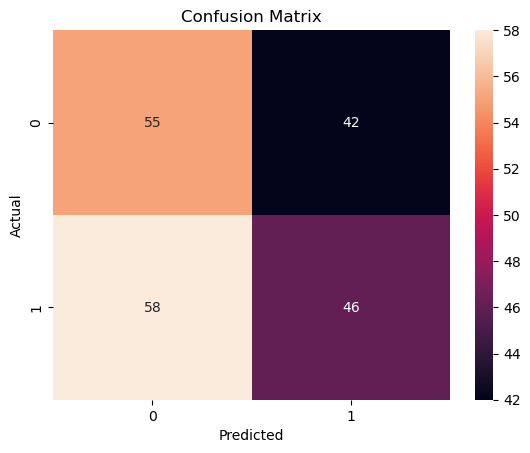

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.49      0.57      0.52        97
     class 1       0.52      0.44      0.48       104

    accuracy                           0.50       201
   macro avg       0.50      0.50      0.50       201
weighted avg       0.51      0.50      0.50       201



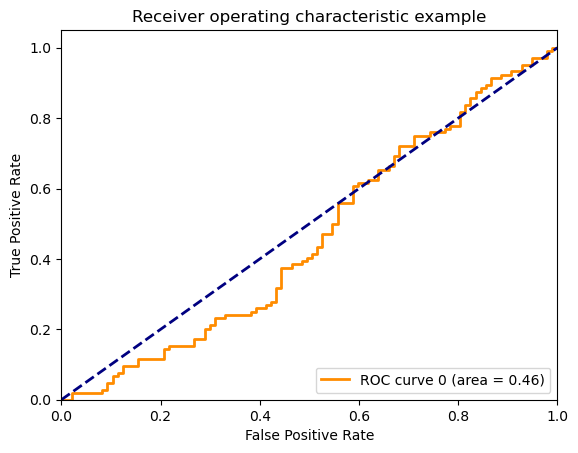

In [ ]:
y_roc = label_binarize(y, classes = [0, 1])
y_test_roc = label_binarize(y_test, classes = [0, 1])
n_classes = y_roc.shape[1]

y_score = best_clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve 0 (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

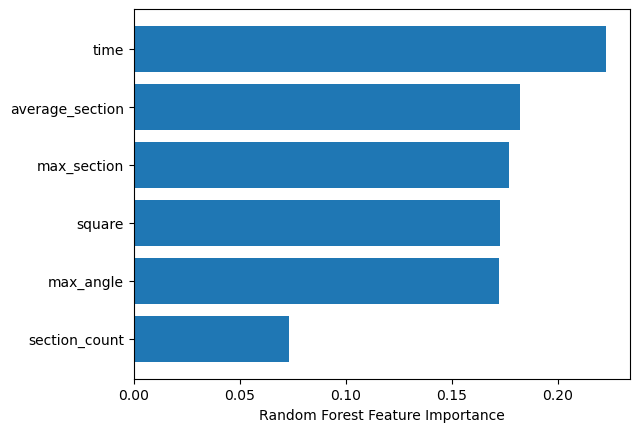

In [ ]:
sorted_idx = best_clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], best_clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
np.sum(best_clf.feature_importances_)

1.0000000000000002

KNN

In [ ]:
grid_params = {'n_neighbors' : [i for i in range(1, 11)],
                'weights': ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan']}

In [ ]:
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, grid_params, verbose = 1, cv = 3, n_jobs = -1)
grid_knn.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
best_clf = grid_knn.best_estimator_
best_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
y_pred = best_clf.predict(X_test)

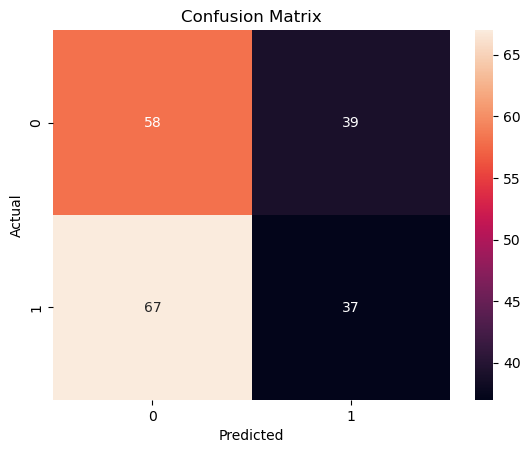

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.46      0.60      0.52        97
     class 1       0.49      0.36      0.41       104

    accuracy                           0.47       201
   macro avg       0.48      0.48      0.47       201
weighted avg       0.48      0.47      0.46       201



SVM

In [ ]:
from sklearn.svm import SVC
param_grid = {  'C': [0.1, 1, 10],
                'kernel': ['rbf', 'sigmoid']}

In [ ]:
svc_clas = SVC()
grid_svm = GridSearchCV(svc_clas, param_grid, refit = True, cv = 3, n_jobs = -1)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'sigmoid']})

In [ ]:
best_clf = grid_svm.best_estimator_
best_clf.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
y_pred = best_clf.predict(X_test)

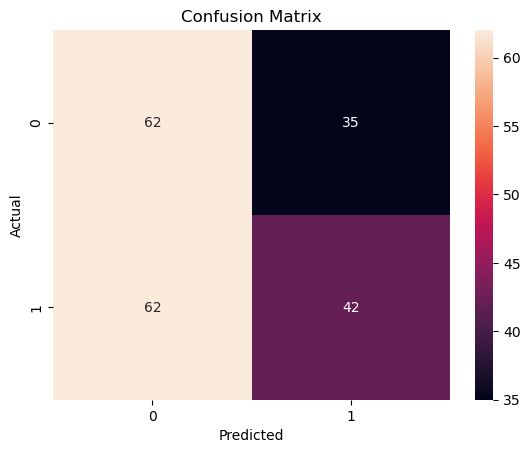

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g')

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()

In [ ]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.50      0.64      0.56        97
     class 1       0.55      0.40      0.46       104

    accuracy                           0.52       201
   macro avg       0.52      0.52      0.51       201
weighted avg       0.52      0.52      0.51       201

